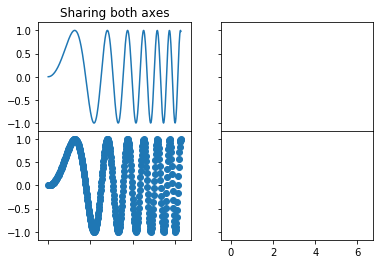

In [12]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')


# Three subplots sharing both x/y axes
f, (ax1, ax2) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1[0].plot(x, y)
ax1[0].set_title('Sharing both axes')
ax2[0].scatter(x, y)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()
labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4']
colors = []

In [13]:
fig = plt.figure(figsize=(2, 1.25))
patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in zip(labels, colors)]
fig.legend(patches, labels, loc='center', frameon=False)
plt.show()

<Figure size 144x90 with 0 Axes>

In [14]:
def create_standalone_legend(color_dict, filename):

    fig = plt.figure()
    figlegend = pylab.figure(figsize=(3,2))
    ax = fig.add_subplot(111)
    lines = ax.bar(range(10), pylab.randn(10), range(10), pylab.randn(10), color=color_dict.values())
    plt.tight_layout()
    figlegend.legend(lines, color_dict.keys(), 'center')
    figlegend.savefig(filename, dpi=500)    

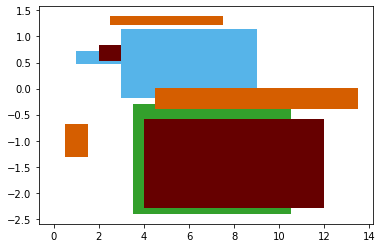

<Figure size 216x144 with 0 Axes>

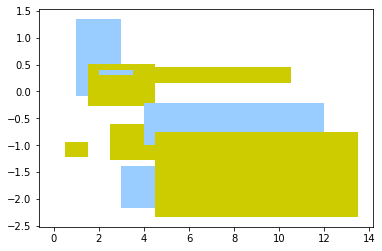

<Figure size 216x144 with 0 Axes>

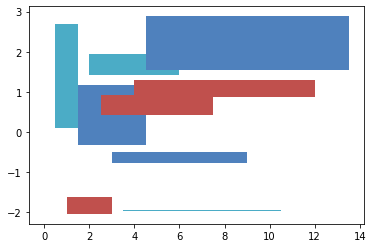

<Figure size 216x144 with 0 Axes>

In [15]:
filename = 'legend_1.pdf'
color_dict = {'CHP': '#660000',
              'Gas boiler': '#d55e00',
              'Heat pumps': '#56b4e9',
              'Thermal storage':'#33a02c'
             }
create_standalone_legend(color_dict, filename)

filename = 'legend_2.pdf'
color_dict = {'Electricity': '#99ccff',
              'Gas': '#cccc00'}
create_standalone_legend(color_dict, filename)

filename = 'legend_3.pdf'
color_dict = {'Spot price': '#4f81bd',
              'Taxes': '#4bacc6',
              'Network charges': '#c0504d'}
['#c0504d', '#4bacc6', '#4f81bd']
create_standalone_legend(color_dict, filename)

In [16]:
filename = '/home/jann/Desktop/repos/model_development/System_B/Model_2/results/production_run/data_postprocessed/price_electricity_all.csv'
price_el_all = pd.read_csv(filename, header=[0,1,2,3], index_col=0)

In [17]:
price_el_all

0_hp-2018_ff_0                                                            \
      bus_el_export source_electricity source_electricity_flex                  
            sold_el      bus_el_import           bus_el_import                  
     variable_costs     variable_costs                     max variable_costs   
0            -51.96         103.851473                       0      40.971473   
1            -51.90         103.791473                       0      40.911473   
2            -49.13         101.021473                       0      38.141473   
3            -47.03          98.921473                       0      36.041473   
4            -47.43          99.321473                       0      36.441473   
5            -44.75          96.641473                       0      33.761473   
6            -42.10          93.991473                       0      31.111473   
7            -46.47          98.361473                       0      35.481473   
8            -47.88          99.771473                       0      36.891473   
9            -52.81         104.701473                       0      41.821473   
10           -57.24         109.131473                       0      46.251473   
11           -57.42         109.311473                       0      46.431473   
12           -58.66         110.551473                       0      47.671473   
13           -59.70         111.591473                       0      48.711473   
14           -60.66         112.551473                       0      49.671473   
15           -66.33         118.221473                       0      55.341473   
16           -75.12         127.011473                       0      64.131473   
17           -82.59         134.481473                       0      71.601473   
18           -84.95         136.841473                       0      73.961473   
19           -81.97         133.861473                       0      70.981473   
20           -75.93         127.821473                       0      64.941473   
21           -69.83         121.721473                       0      58.841473   
22           -73.17         125.061473                       0      62.181473   
23           -64.06         115.951473                       0      53.071473   
24           -61.54         113.431473                       0      50.551473   
25           -59.91         111.801473                       0      48.921473   
26           -59.11         111.001473                       0      48.121473   
27           -58.89         110.781473                       0      47.901473   
28           -58.73         110.621473                       0      47.741473   
29           -62.18         114.071473                       0      51.191473   
...             ...                ...                     ...            ...   
8730         -47.01          98.901473                       0      36.021473   
8731         -47.18          99.071473                       0      36.191473   
8732         -42.13          94.021473                       0      31.141473   
8733         -35.62          87.511473                       0      24.631473   
8734         -35.71          87.601473                       0      24.721473   
8735         -30.73          82.621473                       1      19.741473   
8736         -28.96          80.851473                       1      17.971473   
8737         -26.01          77.901473                       1      15.021473   
8738         -30.41          82.301473                       1      19.421473   
8739         -27.29          79.181473                       1      16.301473   
8740         -31.08          82.971473                       0      20.091473   
8741         -32.16          84.051473                       0      21.171473   
8742         -30.14          82.031473                       1      19.151473   
8743         -35.09          86.981473                       0      24.101473   
8744         -35.17          87.0614

In [18]:
price_el_import = price_el_all.loc[:, (slice(None), ['source_electricity'])]
price_el_import

,0_hp-2018_ff_0,0_hp-2018_sq_0,0_hp-2030_ff_0,0_hp-2030_sq_0,0_hp-2050_ff_0,0_hp-2050_sq_0
,source_electricity,source_electricity,source_electricity,source_electricity,source_electricity,source_electricity
,bus_el_import,bus_el_import,bus_el_import,bus_el_import,bus_el_import,bus_el_import
,variable_costs,variable_costs,variable_costs,variable_costs,variable_costs,variable_costs
0,103.851473,136.891473,100.471473,144.991473,92.021473,133.661473
1,103.791473,136.831473,100.411473,144.931473,91.961473,133.601473
2,101.021473,134.061473,97.641473,142.161473,89.191473,130.831473
3,98.921473,131.961473,95.541473,140.061473,87.091473,128.731473
4,99.321473,132.361473,95.941473,140.461473,87.491473,129.131473
5,96.641473,129.681473,93.261473,137.781473,84.811473,126.451473
6,93.991473,127.031473,90.611473,135.131473,82.161473,123.801473


/home/jann/Desktop/repos/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
No handles with labels found to put in legend.


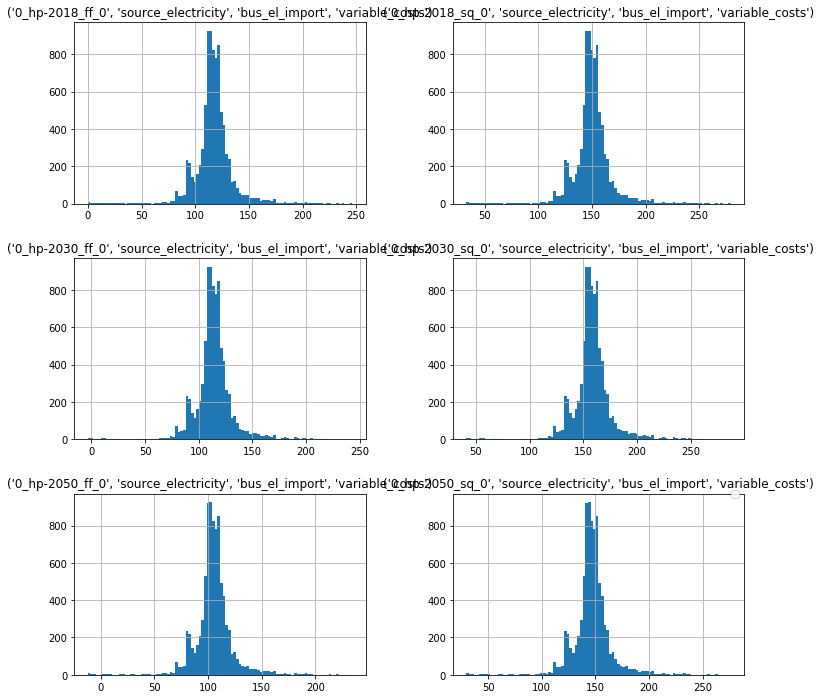

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
price_el_import.hist(ax=ax, bins=100)
plt.legend(loc='center right', bbox_to_anchor=(1, 1))

In [21]:
price_el_import = price_el_all.loc[:, (slice(None), ['source_electricity'])]

In [22]:
for i, row in mr['pth_heat_pump_decentral']['network_charges_WP'].items():
    label = '_'.join(map(str, i))
    price_el_import[label] += row
price_el_import

NameError: name 'mr' is not defined

In [65]:
price_el_import.columns = price_el_import.columns.get_level_values(0)

r_dict = {
    '0_hp-2018_ff_0': 'Flex friendly 2018',
    '0_hp-2018_sq_0': 'Status quo 2018',
    '0_hp-2030_ff_0': 'Flex friendly 2030',
    '0_hp-2030_sq_0': 'Status quo 2030',
    '0_hp-2050_ff_0': 'Flex friendly 2050',
    '0_hp-2050_sq_0': 'Status quo 2050'
}

price_el_import.columns = [r_dict[k] for k in price_el_import.columns]
price_el_import

,Flex friendly 2018,Status quo 2018,Flex friendly 2030,Status quo 2030,Flex friendly 2050,Status quo 2050
0,121.851473,188.791473,120.331473,202.261473,114.861473,199.521473
1,121.791473,188.731473,120.271473,202.201473,114.801473,199.461473
2,119.021473,185.961473,117.501473,199.431473,112.031473,196.691473
3,116.921473,183.861473,115.401473,197.331473,109.931473,194.591473
4,117.321473,184.261473,115.801473,197.731473,110.331473,194.991473
5,114.641473,181.581473,113.121473,195.051473,107.651473,192.311473
6,111.991473,178.931473,110.471473,192.401473,105.001473,189.661473
7,116.361473,183.301473,114.841473,196.771473,109.371473,194.031473
8,117.771473,184.711473,116.251473,198.181473,110.781473,195.441473
9,122.701473,189.641473,121.181473,203.111473,115.711473,200.371473


In [66]:
price_el_import = price_el_import.loc[:,['Status quo 2018',  'Status quo 2030', 'Status quo 2050',
                                  'Flex friendly 2018', 'Flex friendly 2030', 'Flex friendly 2050']]
price_el_import

,Status quo 2018,Status quo 2030,Status quo 2050,Flex friendly 2018,Flex friendly 2030,Flex friendly 2050
0,188.791473,202.261473,199.521473,121.851473,120.331473,114.861473
1,188.731473,202.201473,199.461473,121.791473,120.271473,114.801473
2,185.961473,199.431473,196.691473,119.021473,117.501473,112.031473
3,183.861473,197.331473,194.591473,116.921473,115.401473,109.931473
4,184.261473,197.731473,194.991473,117.321473,115.801473,110.331473
5,181.581473,195.051473,192.311473,114.641473,113.121473,107.651473
6,178.931473,192.401473,189.661473,111.991473,110.471473,105.001473
7,183.301473,196.771473,194.031473,116.361473,114.841473,109.371473
8,184.711473,198.181473,195.441473,117.771473,116.251473,110.781473
9,189.641473,203.111473,200.371473,122.701473,121.181473,115.711473


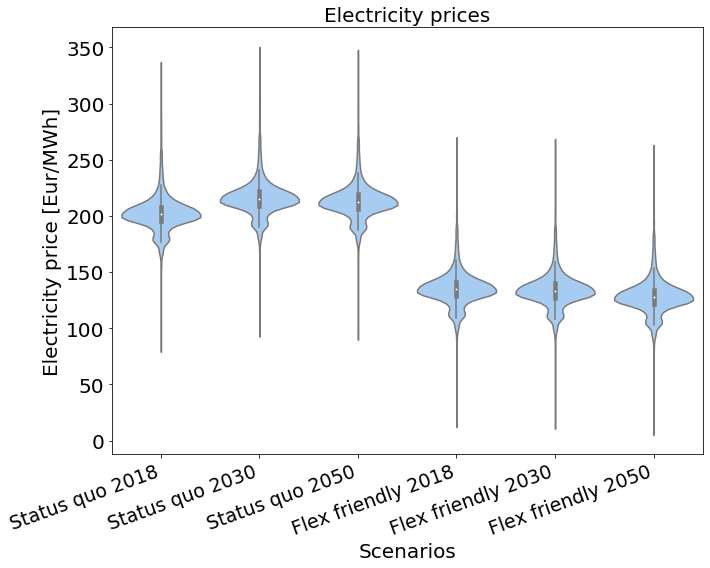

In [67]:
fig = plt.figure(figsize=(10,8))
ax = sns.violinplot(data=price_el_import, color='#99ccff')
ax.set_xticklabels(price_el_import.columns.get_level_values(0),
                      # ['Flex friendly 2018', 'Status quo 2018', 'Flex friendly 2050', 'Status quo 2050'],
                   size=19,
                   ha='right',
                   rotation=20)
plt.setp(ax.get_yticklabels(), size=20)
ax.set_ylabel('Electricity price [Eur/MWh]', size=20)
ax.set_title('Electricity prices', size=20)
ax.set_xlabel('Scenarios', size=20)
plt.tight_layout()
plt.savefig('Electricity violin plots.png', dpi=400)

In [19]:
price_el_all.max()

0_hp-2018_ff_0  bus_el_export            sold_el        variable_costs      52.060000
                source_electricity       bus_el_import  variable_costs     246.411473
                source_electricity_flex  bus_el_import  max                  1.000000
                                                        variable_costs     183.531473
0_hp-2018_sq_0  bus_el_export            sold_el        variable_costs      52.060000
                source_electricity       bus_el_import  variable_costs     279.451473
                source_electricity_flex  bus_el_import  max                  1.000000
                                                        variable_costs    1170.331473
0_hp-2030_ff_0  bus_el_export            sold_el        variable_costs      52.060000
                source_electricity       bus_el_import  variable_costs     243.031473
                source_electricity_flex  bus_el_import  max                  1.000000
                                                      

In [20]:
price_el_flex = price_el_all.loc[:, (slice(None), ['source_electricity_flex'])]
price_el_flex

0_hp-2018_ff_0                         0_hp-2018_sq_0  \
     source_electricity_flex                source_electricity_flex   
               bus_el_import                          bus_el_import   
                         max variable_costs                     max   
0                          0      40.971473                       0   
1                          0      40.911473                       0   
2                          0      38.141473                       0   
3                          0      36.041473                       0   
4                          0      36.441473                       0   
5                          0      33.761473                       0   
6                          0      31.111473                       0   
7                          0      35.481473                       0   
8                          0      36.891473                       0   
9                          0      41.821473                       0   
10                         0      46.251473                       0   
11                         0      46.431473                       0   
12                         0      47.671473                       0   
13                         0      48.711473                       0   
14                         0      49.671473                       0   
15                         0      55.341473                       0   
16                         0      64.131473                       0   
17                         0      71.601473                       0   
18                         0      73.961473                       0   
19                         0      70.981473                       0   
20                         0      64.941473                       0   
21                         0      58.841473                       0   
22                         0      62.181473                       0   
23                         0      53.071473                       0   
24                         0      50.551473                       0   
25                         0      48.921473                       0   
26                         0      48.121473                       0   
27                         0      47.901473                       0   
28                         0      47.741473                       0   
29                         0      51.191473                       0   
...                      ...            ...                     ...   
8730                       0      36.021473                       0   
8731                       0      36.191473                       0   
8732                       0      31.141473                       0   
8733                       0      24.631473                       0   
8734                       0      24.721473                       0   
8735                       1      19.741473                       1   
8736                       1      17.971473                       1   
8737                       1      15.021473                       1   
8738                       1      19.421473                       1   
8739                       1      16.301473                       1   
8740                       0      20.091473                       0   
8741                       0      21.171473                       0   
8742                       1      19.151473                       1   
8743                       0      24.101473                       0   
8744                       0      24.181473                       0   
8745                       0      24.221473                       0   
8746                       0      29.061473                       0   
8747                       0      29.211473                       0   
8748                       0      24.461473                       0   
8749                       0      22.051473                       0   
8750                       0      20.071473                       0   
8751                       0      20.3

/home/jann/Desktop/repos/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
No handles with labels found to put in legend.


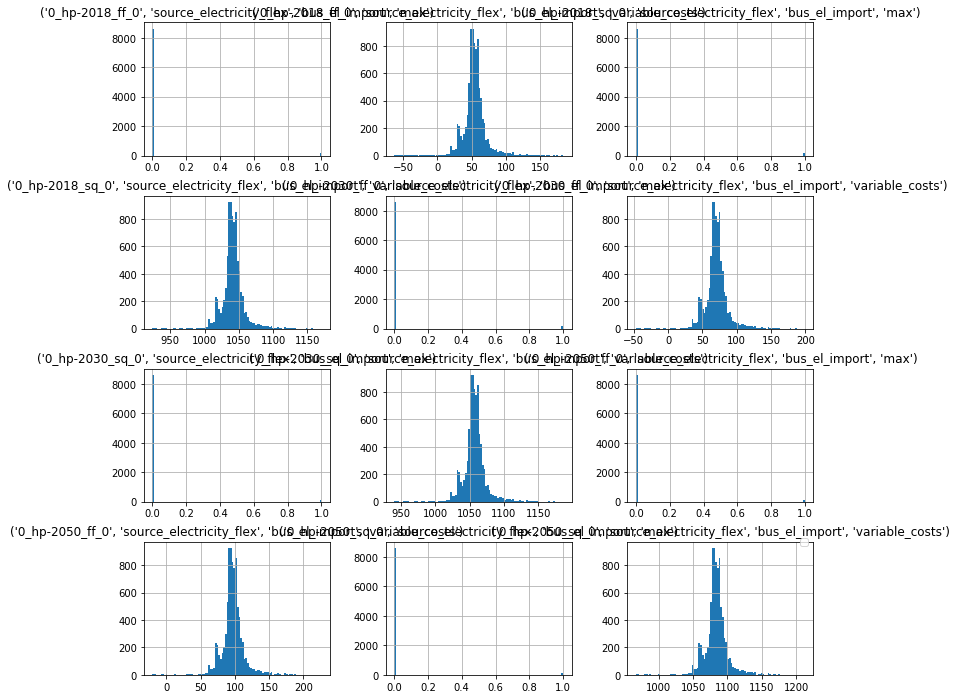

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
price_el_flex.hist(ax=ax, bins=100)
plt.legend(loc='center right', bbox_to_anchor=(1, 1))

In [22]:
import pandas as pd
filename = '/home/jann/Desktop/repos/model_development/System_B/Model_2/results/production_run/data_postprocessed/0_hp-2018_ff_0/timeseries/results_timeseries.csv'
timeseries = pd.read_csv(filename, header=[0,1,2], index_col=0)

In [23]:
timeseries.loc[:, ('source_electricity_flex')].sum()*3.5

               variable_name
bus_el_import  flow             4497.790073
dtype: float64

In [37]:
import numpy as np

In [38]:
x = np.arange(0,10,0.1)
y = np.sin(x) +20
y_norm = y - y.mean()

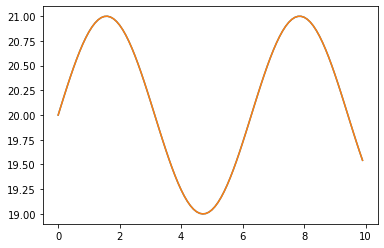

In [39]:
plt.plot(x, y)
plt.plot(x, y_norm + y.mean())


In [28]:
filename = '/home/jann/Desktop/repos/model_development/System_B/Model_2/results/production_run/data_preprocessed/model_runs.csv'
mr = pd.read_csv(filename, header=[0,1], index_col=[0,1,2])

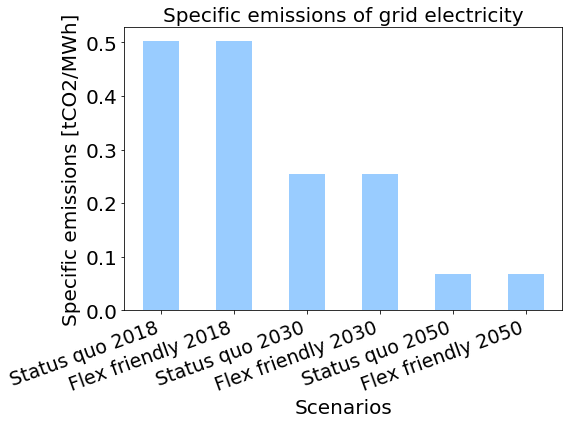

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
df = mr['source_electricity', 'emission_specific']
df.plot.bar(ax=ax, color='#99ccff')
ax.set_xticklabels([r_dict['_'.join(map(str,l))] for l in df.index],
                   size=19,
                   rotation=20,
                   ha='right')
plt.setp(ax.get_yticklabels(), size=20)
ax.set_ylabel('Specific emissions [tCO2/MWh]', size=20)
ax.set_title('Specific emissions of grid electricity', size=20)
ax.set_xlabel('Scenarios', size=20)
plt.tight_layout()
plt.savefig('Specific emission assumptions.png', dpi=400)

In [30]:
df

run_id  scenario    uncert_sample_id
0       hp-2018_sq  0                   0.503
        hp-2018_ff  0                   0.503
        hp-2030_sq  0                   0.254
        hp-2030_ff  0                   0.254
        hp-2050_sq  0                   0.067
        hp-2050_ff  0                   0.067
Name: (source_electricity, emission_specific), dtype: float64

run_id  scenario    uncert_sample_id
0       hp-2018_sq  0                   51.90
        hp-2018_ff  0                   18.00
        hp-2030_sq  0                   57.27
        hp-2030_ff  0                   19.86
        hp-2050_sq  0                   65.86
        hp-2050_ff  0                   22.84
Name: network_charges_WP, dtype: float64